# Python code

This section of the notes collects together some of the Python material from previous sections, to help you with the coursework.


## Import packages as required

The `numpy` function library is required for numeric calculations. It allows us to do mathematics using transcendental quantities such as $\pi$ and $e$, and it introduces mathematical functions such as $\sin$ and $\cos$. In the preamble below we import the library using a convenient short name `np`. Therefore to use the definitions from this library we have to type `np.def` where `def` is the definition or function that we want to use. Crucially, the `numpy` library also allows us to create and work with arrays, whilst other mathematical libraries in Python do not have this functionality.

The `matplotlib.pyplot` library is used to make plots of our results. In the preamble below we import the library using a convenient short name `plt`. It allows us to create a variety of figures, including `plot`, `quiver`, and `streamplot` types.

The `scipy` library is a very powerful suite of scientific methods. We will only use one function from this vast library, and so we import it with its own name. The `odeint` function is used to solve ordinary differential equations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Make a line series

To make a line series plot we need to define a set of $x$ values and corresponding $y$ values. The example below produces a plot of $\sin(x)$ between $x=0$ and $x=1$.

The function `linspace(start,end,n)` is used to generate a list of $n$ equally spaced values between the specified start and end values.

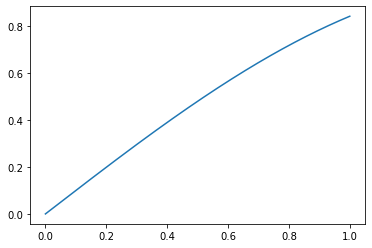

In [2]:
x=np.linspace(0,1,1000)
y=np.sin(x)
plt.plot(x,y)
plt.show()

## Set up and solve an ODE for given conditions

The `odeint` solver is designed to solve systems of the following form:

\begin{equation*}
\frac{\mathrm{d}}{\mathrm{d}t}X=f(X,t,\dots)
\end{equation*}

where $\dots$ is a list of parameters. For example, in {numref}`undamp-pend` we looked at the following system involving parameters $\omega$ and $k$:

\begin{equation*}
\frac{\mathrm{d}}{\mathrm{d}t}\begin{bmatrix}x\\y\end{bmatrix}=\begin{bmatrix}y\\-\omega^2\sin(x)-ky\end{bmatrix}
\end{equation*}

In this example there is no explicit time-dependence in function $f$, but we have to include `t` in our list of input arguments for the function definition, because `odeint` expects this.

We can write our function definition as follows. Here, we have named the function `pend`, but you can choose any name for your function.

Since `X` is supposed to be a state $X=[x,y]$, writing `X[0]` refers to the $x$ value and writing `X[1]` refers to the $y$ value.

In [3]:
def pend(X,t,w,k):
  dxdt = X[1]
  dydt = -w**2*np.sin(X[0])-k*X[1]
  return [dxdt, dydt]

To solve the ode we have to provide initial conditions and parameter values. We also have to define the list of time points that we want to find the solution for.

In [4]:
t0=0; X0=[1,0] #initial conditions for t,x,y
w=1; k=0

tmax=20
t = np.linspace(0,20,100)    # time points

# solve ODE
X = odeint(pend,X0,t,args=(w,k))

The output `X` returned by the solver will be an array. Each column in the array gives the values of one of the dependent variables at the time points we specified. Here the first column `X[:,0]` contains the results for $x$ and the second column `X[:,1]` contains the results for $y$.

```{admonition} Test yourself!
* Plot the time series for $x(t)$
* Plot the phase portrait for $(x,y)$
```
````{toggle}
The solutions are simply

```{code}
plt.plot(t,X[:,0])
plt.plot(X[:,0],X[:,1])
```

You can add axis labels and further customise the plot using techniques such as

```{code}
plt.xlabel('x')
plt.xlim([0,,10])
```

````

## Vector plots and stream plots

To produce vector and stream plots we first need to define a grid. We do this by specifying lists of $x$ and $y$ values that cover the domain we are interested in. We then use the `meshgrid` function to combine the lists into a grid of coordinates.

In this example we will create a grid covering $x,y\in[-2,2]$, with 20 grid points in each direction.

In [5]:
x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)
[X,Y]=np.meshgrid(x,y)

Where `x,y` were 1D arrays corresponding to the coordinate axes, `X,Y` are 2D arrays corresponding to the ordinate values on the grid. Each pair of values from (`X`,`Y`) in matching positions defines a single coordinate.

We can use `X,Y` to create vector field values on the grid. For example, in {numref}`unst-nod` we constructed the vector field for $(u,v)$ such that

\begin{align}
u&=4x+y\\
v&=2x+3y
\end{align}

The code we need is shown below. We must take care to use the grid values `X,Y` to create the vector field, not the axis values `x,y`.

In [6]:
(U,V)=(4*X+Y,2*X+3*Y)

Finally, we can plot the vector field using `quiver` or we can (attempt) to create the paths tangent to the vector field by using `streamplot`.

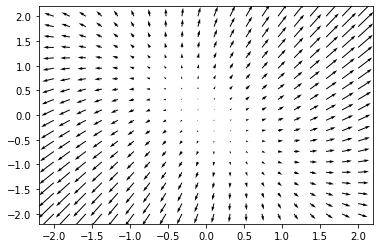

In [7]:
plt.quiver(X,Y,U,V)
plt.show()

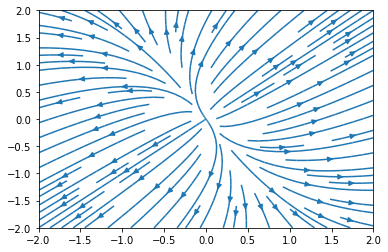

In [8]:
plt.streamplot(X,Y,U,V)
plt.show()

Note that the quality of the streamplot is poor. It can be made to look much better with more sophisticated use of the `streamplot` function, but this is not something that you will be required to do.